# Landscape Art Adventures

In [1]:
(ns opencv4.cartoon3
 (:require
  [opencv4.core :refer :all]
  [opencv4.utils :as u]))

nil

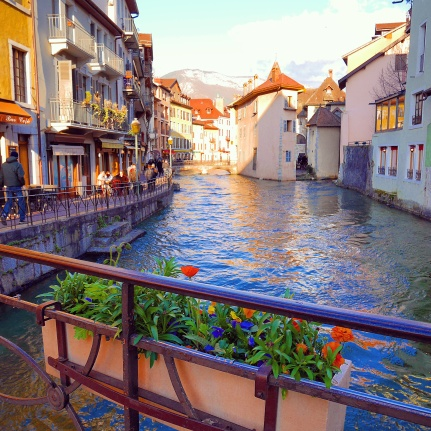

In [2]:
(def img
  (-> "resources/chapter03/canals2.jpg"
  (imread IMREAD_REDUCED_COLOR_4)))
(u/>>> img)

## smoothing the picture using a bilateral filter

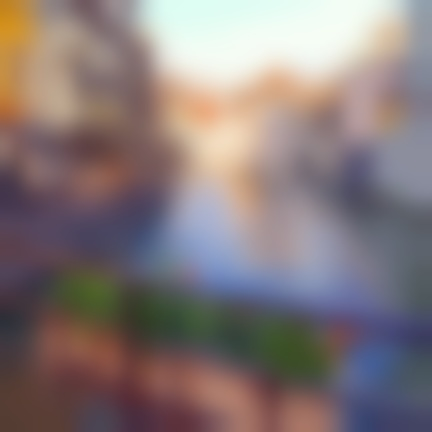

In [3]:
(def factor 4)
(def output (new-mat))
(def work (clone img))

(dotimes [_ factor] (pyr-down! work))
(bilateral-filter work output 9 9 7)
(dotimes [_ factor] (pyr-up! output))

(u/>>> output)

## detect and enhance edges

- Reduce noise using a median filter
- Create an edge mask using adaptive thresholding

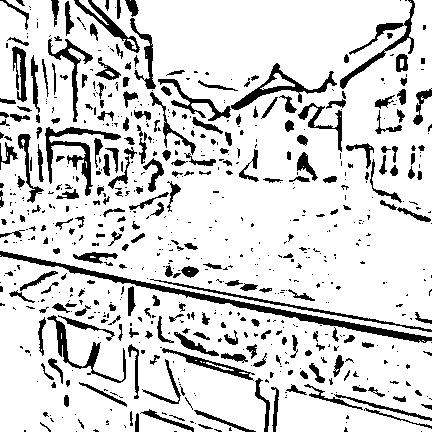

In [4]:
(def edge
  (-> img
    clone
    (resize! (new-size (.cols output) (.rows output)))
    (cvt-color! COLOR_RGB2GRAY)
    (median-blur! 7)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY 9 7)
    (cvt-color! COLOR_GRAY2RGB)))
(u/>>> edge)

## Combine color image with edge mask

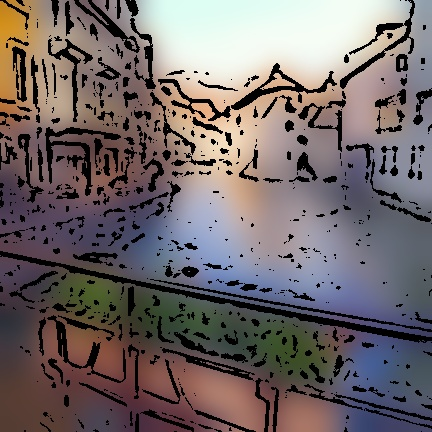

In [5]:
(let [result (new-mat) ]
  (bitwise-and output edge result)
  (u/>>> result))

## Playing with contours

Of course you can play with the contours size and numbers. The adaptive-threshold! does that with its last two parameters. 

The **edges-thickmess** parameter controls how thick the contours will be, and the **edges-number** controls how many of them should be drawn. 

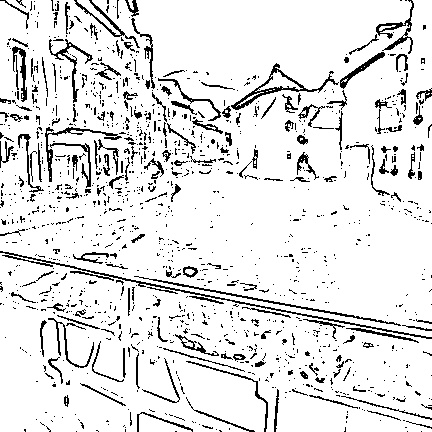

In [13]:
(def edges-thickness 5)
(def edges-number 5)
(def edge
  (-> img
    clone
    (resize! (new-size (.cols output) (.rows output)))
    (cvt-color! COLOR_RGB2GRAY)
    (median-blur! 7)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY edges-thickness edges-number)
    (cvt-color! COLOR_GRAY2RGB)))

(u/>>> edge)

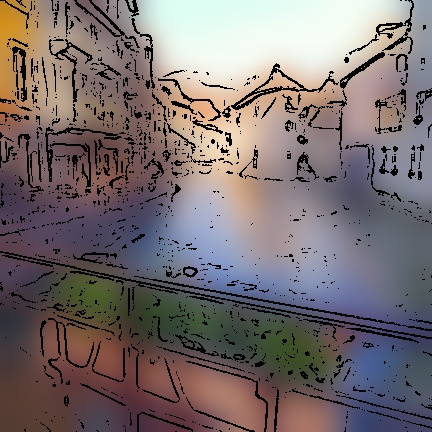

In [14]:
(let [result (new-mat) ]
  (bitwise-and output edge result)
  (u/>>> result))

## turning all this in functions

In [15]:
(defn smoothing!
  [img factor filter-size filter-value]
  (let [ work (clone img) output (new-mat)]
  (dotimes [_ factor] (pyr-down! work))
  (bilateral-filter work output filter-size filter-size filter-value)
  (dotimes [_ factor] (pyr-up! output))
  (resize! output (new-size (.cols img) (.rows img)))))

(defn edges!
  [img e1 e2 e3]
  (-> img
    clone
    (cvt-color! COLOR_RGB2GRAY)
    (median-blur! e1)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY e2 e3)
    (cvt-color! COLOR_GRAY2RGB)))

(defn cartoonize!
  [ img s1 s2 s3 e1 e2 e3]
    (let [ output (smoothing! img s1 s2 s3) edge (edges! img e1 e2 e3)]
    (bitwise-and output edge output)
    output))

#'opencv4.cartoon3/cartoonize!

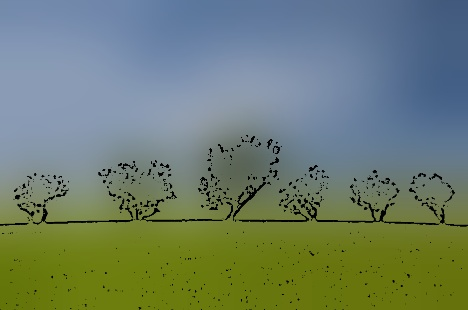

In [16]:
(->
  "resources/landscape/landscape-nature-sky-blue.jpg"
  imread
  (u/resize-by 0.2)
  (cartoonize! 6 9 7  7 9 11)
  (u/resize-by 0.5)
  (u/>>> ))

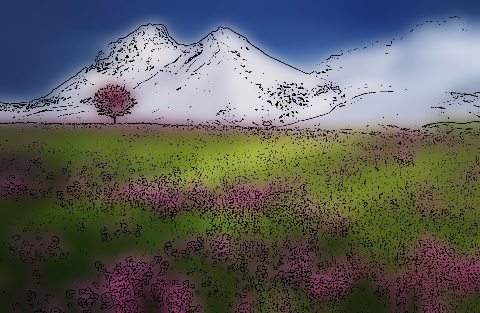

In [17]:

(->
  "resources/landscape/amazing-beautiful-beauty-blue.jpg"
  imread
  (cartoonize! 5 9 7  7 7 5)
  (u/resize-by 0.25)
  (u/>>>))

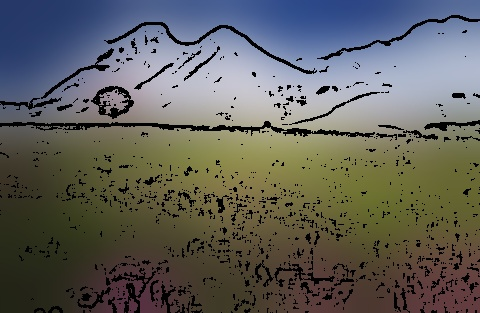

In [18]:

(->
  "resources/landscape/amazing-beautiful-beauty-blue.jpg"
  imread
  (u/resize-by 0.25)
  (cartoonize! 5 9 7  7 7 5)
  (u/>>>))

## Some Examples 

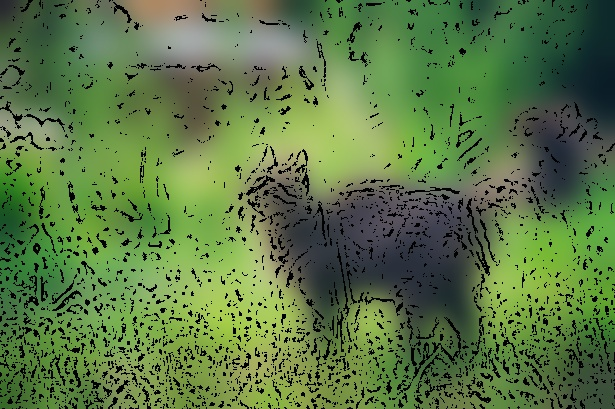

In [19]:
(-> "https://i2-prod.walesonline.co.uk/incoming/article9527708.ece/ALTERNATES/s615/cat-garden.jpg"
  u/mat-from-url
  ;(u/resize-by 0.5)
  (cartoonize! 4 7 7  5 5 5)
  (u/>>>))

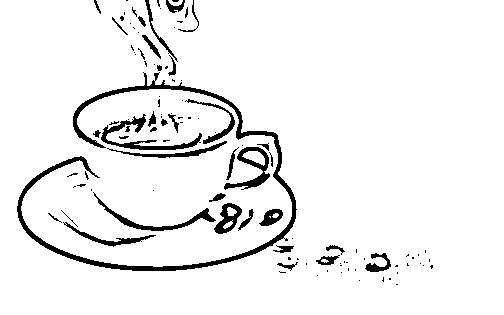

In [20]:
(-> "http://media.graytvinc.com/images/Cup-of-coffee-coffee-17731301-1680-1050.jpg"
    (u/mat-from-url)
    (u/resize-by 0.3)    
    ;(cartoonize! 4 7 7  5 5 5)
    (edges! 5 9 7)
    (u/>>>))

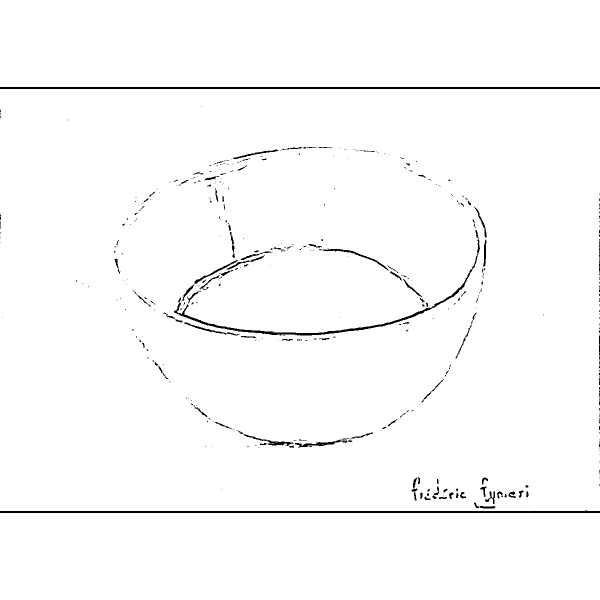

In [21]:
(-> "http://www.fredericeymeri.com/34-thickbox_liquid/bol-de-cafe.jpg" 
    (u/mat-from-url)
    (edges! 5 9 7) 
    (u/resize-by 0.5)  
    (u/>>>))

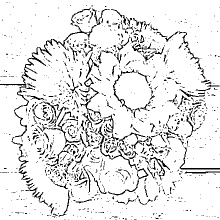

In [22]:
(-> "https://bouqs-production-weblinc.netdna-ssl.com/product_images/gold-rush_peach-asiatic-lilies/Deluxe/593e2dec6170703412000020/large_thumb.jpg?c=1497247212"
  (u/mat-from-url)
    (edges! 3 5 7) 
    (u/resize-by 0.5)
    (imwrite "/Users/niko/Desktop/flower.png")
    (u/>>>))

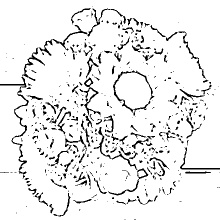

In [23]:
(-> "https://bouqs-production-weblinc.netdna-ssl.com/product_images/hello-sunshine_sunflowers-solidago/Deluxe/593e2e6961707034120000f2/large_thumb.jpg?c=1497247337"
    (u/mat-from-url)
    (edges! 5 7 9) 
    (u/resize-by 0.5)
    ;(imwrite "/Users/niko/Desktop/flower.png")
    (u/>>>))